### pd.crosstab

In [1]:
import pandas as pd
import numpy as np

#Create a DataFrame
d = {
    'Name':['Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine',
            'Alisa','Bobby','Cathrine','Alisa','Bobby','Cathrine'],
    'Exam':['Semester 1','Semester 1','Semester 1','Semester 1','Semester 1','Semester 1',
            'Semester 2','Semester 2','Semester 2','Semester 2','Semester 2','Semester 2'],
    
    'Subject':['Mathematics','Mathematics','Mathematics','Science','Science','Science',
               'Mathematics','Mathematics','Mathematics','Science','Science','Science'],
   'Result':['Pass','Pass','Fail','Pass','Fail','Pass','Pass','Fail','Fail','Pass','Pass','Fail']}

df = pd.DataFrame(d,columns=['Name','Exam','Subject','Result'])
df

,Name,Exam,Subject,Result
0,Alisa,Semester 1,Mathematics,Pass
1,Bobby,Semester 1,Mathematics,Pass
2,Cathrine,Semester 1,Mathematics,Fail
3,Alisa,Semester 1,Science,Pass
4,Bobby,Semester 1,Science,Fail
5,Cathrine,Semester 1,Science,Pass
6,Alisa,Semester 2,Mathematics,Pass
7,Bobby,Semester 2,Mathematics,Fail
8,Cathrine,Semester 2,Mathematics,Fail
9,Alisa,Semester 2,Science,Pass


In [5]:
# 2 way cross table

my_crosstab = pd.crosstab(df.Subject, df.Result,margins=True)
my_crosstab

Result,Fail,Pass,All
Subject,,,
Mathematics,3,3,6
Science,2,4,6
All,5,7,12


In [6]:
#### Rename the index and columns

my_crosstab.columns = ["Fail" , "Pass" , "rowtotal"] 
my_crosstab.index= ["Mathematics","Science","coltotal"]
my_crosstab

,Fail,Pass,rowtotal
Mathematics,3,3,6
Science,2,4,6
coltotal,5,7,12


In [10]:
#### Get the over all proportion

my_crosstab/my_crosstab.loc["coltotal","rowtotal"]

,Fail,Pass,rowtotal
Mathematics,0.250000,0.250000,0.5
Science,0.166667,0.333333,0.5
coltotal,0.416667,0.583333,1.0


In [12]:
#### Get the column proportion

my_crosstab/my_crosstab.loc["coltotal"]

,Fail,Pass,rowtotal
Mathematics,0.6,0.428571,0.5
Science,0.4,0.571429,0.5
coltotal,1.0,1.000000,1.0


In [13]:
#### Get the row proportion

my_crosstab.div(my_crosstab["rowtotal"],axis=0)

,Fail,Pass,rowtotal
Mathematics,0.500000,0.500000,1.0
Science,0.333333,0.666667,1.0
coltotal,0.416667,0.583333,1.0


In [14]:
# 3 way cross table

pd.crosstab([df.Subject, df.Exam],df.Result, margins=True)

Result                  Fail  Pass  All
Subject     Exam                       
Mathematics Semester 1     1     2    3
            Semester 2     2     1    3
Science     Semester 1     1     2    3
            Semester 2     1     2    3
All                        5     7   12

In [ ]:
from pptx import Presentation
import os

prs = Presentation()
title_slide_layout = prs.slide_layouts[0]
slide = prs.slides.add_slide(title_slide_layout)
title = slide.shapes.title
subtitle = slide.placeholders[1]

title.text = "Hello, World!"
subtitle.text = "python-pptx was here!"

prs.save('test.pptx')
os.startfile('test.pptx')

In [264]:
from pptx import Presentation
from pptx.util import Inches

img_path = 'chart_test.png'

prs = Presentation()
prs.slide_width = 12192000
prs.slide_height = 6858000

blank_slide_layout = prs.slide_layouts[6]
slide = prs.slides.add_slide(blank_slide_layout)

left = top = Inches(0)
width = Inches(13.3)
height = Inches(7.5)
pic = slide.shapes.add_picture(img_path, left, top, width, height)

# left = Inches(5)
# height = Inches(5.5)
# pic = slide.shapes.add_picture(img_path, left, top, height=height)

prs.save('test.pptx')
os.startfile('test.pptx')

In [373]:
from pptx.enum.dml import MSO_THEME_COLOR
from pptx.util import Pt

text_frame = shape.text_frame
text_frame.clear()  # not necessary for newly-created shape

p = text_frame.paragraphs[0]
run = p.add_run()
run.text = 'Spam, eggs, and spam'

font = run.font
font.name = 'Calibri'
font.size = Pt(18)
font.bold = True
font.italic = None  # cause value to be inherited from theme
font.color.theme_color = MSO_THEME_COLOR.ACCENT_1

NameError: name 'shape' is not defined

In [265]:
from pptx import Presentation
from pptx.util import Inches

prs = Presentation('temp.pptx')

prs.save('temp2.pptx')
os.startfile('temp2.pptx')

In [ ]:
from pptx import Presentation
from pptx.util import Inches

prs = Presentation()
title_only_slide_layout = prs.slide_layouts[5]
slide = prs.slides.add_slide(title_only_slide_layout)
shapes = slide.shapes

shapes.title.text = 'Adding a Table'

rows = cols = 2
left = top = Inches(2.0)
width = Inches(6.0)
height = Inches(0.8)

table = shapes.add_table(rows, cols, left, top, width, height).table

# set column widths
table.columns[0].width = Inches(2.0)
table.columns[1].width = Inches(4.0)

# write column headings
table.cell(0, 0).text = 'Foo'
table.cell(0, 1).text = 'Bar'

# write body cells
table.cell(1, 0).text = 'Baz'
table.cell(1, 1).text = 'Qux'

prs.save('test.pptx')
os.startfile('test.pptx')

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


data = [[ 66386, 174296,  75131, 577908,  32015],
        [ 58230, 381139,  78045,  99308, 160454],
        [ 89135,  80552, 152558, 497981, 603535],
        [ 78415,  81858, 150656, 193263,  69638],
        [139361, 331509, 343164, 781380,  52269]]

columns = ('Freeze', 'Wind', 'Flood', 'Quake', 'Hail')
rows = ['%d year' % x for x in (100, 50, 20, 10, 5)]

values = np.arange(0, 2500, 500)
value_increment = 1000

# Get some pastel shades for the colors
colors = plt.cm.BuPu(np.linspace(0, 0.5, len(rows)))
n_rows = len(data)

index = np.arange(len(columns)) + 0.3
bar_width = 0.4

# Initialize the vertical-offset for the stacked bar chart.
y_offset = np.zeros(len(columns))

# Plot bars and create text labels for the table
cell_text = []
for row in range(n_rows):
    plt.bar(index, data[row], bar_width, bottom=y_offset, color=colors[row])
    y_offset = y_offset + data[row]
    cell_text.append(['%1.1f' % (x / 1000.0) for x in y_offset])
# Reverse colors and text labels to display the last value at the top.
colors = colors[::-1]
cell_text.reverse()
print(cell_text)

# Add a table at the bottom of the axes
the_table = plt.table(cellText=cell_text,
                      rowLabels=rows,
                      rowColours=colors,
                      colLabels=columns,
                      loc='bottom')

# Adjust layout to make room for the table:
plt.subplots_adjust(left=0.2, bottom=0.2)

plt.ylabel("Loss in ${0}'s".format(value_increment))
plt.yticks(values * value_increment, ['%d' % val for val in values])
plt.xticks([])
plt.title('Loss by Disaster')

plt.show()

In [ ]:
["{:X}".format(i) for i in range(10)] 

In [ ]:
["{:02X}".format(10 * i) for i in range(10)] 

In [ ]:
[["" for c in range(10)] for r in range(10)]

In [ ]:
import numpy as np
randn = np.random.randn
from pandas import *

idx = Index(np.arange(1,11))
df = DataFrame(randn(10, 5), index=idx, columns=['A', 'B', 'C', 'D', 'E'])
vals = np.around(df.values,3)

df
# print(df)
# print(vals)

In [ ]:
from matplotlib import pyplot as plt
from itertools import cycle, islice
import pandas, numpy as np  # I find np.random.randint to be better

# Make the data
x = [{i:np.random.randint(1,5)} for i in range(10)]
df = pandas.DataFrame(x)
print(df)

# Make a list by cycling through the colors you care about
# to match the length of your data.
my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(df)))
print(my_colors)

# Specify this list of colors as the `color` option to `plot`.
df.plot(kind='bar', stacked=True, color=my_colors)

NameError: name 'df' is not defined

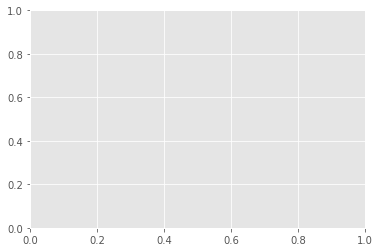

In [152]:
# matplotlib.style.use('ggplot')

fig, ax = plt.subplots()
df[['a', 'c']].plot.bar(stacked=True, width=0.1, position=1.5, colormap="bwr", ax=ax, alpha=0.7)
df[['b', 'd']].plot.bar(stacked=True, width=0.1, position=-0.5, colormap="RdGy", ax=ax, alpha=0.7)
df[['a', 'd']].plot.bar(stacked=True, width=0.1, position=0.5, colormap="BrBG", ax=ax, alpha=0.7)
plt.legend(loc="upper center")
plt.show()

In [43]:
from matplotlib.lines import Line2D 
print(Line2D.filled_markers)
repr(Line2D.filled_markers[0])

('o', 'v', '^', '<', '>', '8', 's', 'p', '*', 'h', 'H', 'D', 'd', 'P', 'X')


"'o'"

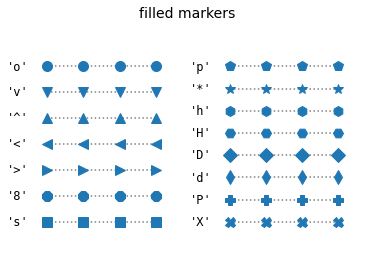

In [44]:
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D 
  
  
# Drawing 3 points for each line 
plotted_points = np.ones(4)  
txt_style = dict(horizontalalignment = 'right', 
                 verticalalignment = 'center', 
                 fontsize = 12, 
                 fontdict = {'family': 'monospace'}) 
  
style = dict(linestyle = ':',  
             color ='0.5',  
             markersize = 10, 
             mfc ="C0", 
             mec ="C0") 
  
  
# helper function for axes formating 
def format_ax(ax): 
      
    ax.margins(0.2) 
    ax.set_axis_off() 
    ax.invert_yaxis() 
  
  
# helper function for splitting list 
def split(a_list): 
      
    i_half = len(a_list) // 2
    return (a_list[:i_half], a_list[i_half:]) 
  
figure, axes = plt.subplots(ncols = 2) 
  
for ax, markers in zip(axes, split(Line2D.filled_markers)): 
      
    for y, marker in enumerate(markers): 
          
        ax.text(-0.5, y, repr(marker), **txt_style) 
        ax.plot(y * plotted_points, marker = marker, 
                **style) 
          
    format_ax(ax) 
      
figure.suptitle('filled markers', fontsize = 14) 
  
plt.show() 

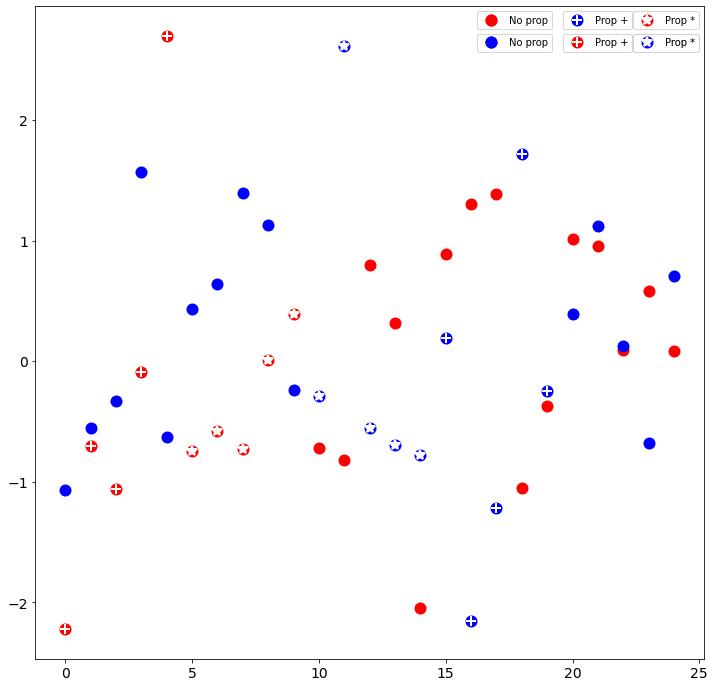

In [45]:
N = 25
y = np.random.randn(N)
x = np.arange(N)

y2 = np.random.randn(25)

# Get current size
fig_size = list(plt.rcParams["figure.figsize"])

# Set figure width to 12 and height to 9
fig_size[0] = 12
fig_size[1] = 12
plt.rcParams["figure.figsize"] = fig_size

# serie A
p1a, = plt.plot(x, y,       "ro", ms=10, mfc="r", mew=2, mec="r")
p1b, = plt.plot(x[:5], y[:5] ,  "w+", ms=10, mec="w", mew=2) 
p1c, = plt.plot(x[5:10], y[5:10], "w*", ms=10, mec="w", mew=2) 

# serie B
p2a, = plt.plot(x, y2,       "bo", ms=10, mfc="b", mew=2, mec="b")
p2b, = plt.plot(x[15:20], y2[15:20] ,  "w+", ms=10, mec="w", mew=2) 
p2c, = plt.plot(x[10:15], y2[10:15], "w*", ms=10, mec="w", mew=2) 

v_factor = 1.
h_factor = 1.

leg1 = plt.legend([(p1a, p1a)], ["No prop"], bbox_to_anchor=[0.78*h_factor, 1.*v_factor])
leg2 = plt.legend([(p2a, p2a)], ["No prop"], bbox_to_anchor=[0.78*h_factor, .966*v_factor])

leg3 = plt.legend([(p2a,p2b)], ["Prop +"], bbox_to_anchor=[0.9*h_factor, 1*v_factor])
leg4 = plt.legend([(p1a, p1b)], ["Prop +"], bbox_to_anchor=[0.9*h_factor, .966*v_factor])

leg5 = plt.legend([(p1a, p1c)], ["Prop *"], bbox_to_anchor=[1.*h_factor, 1.*v_factor])
leg6 = plt.legend([(p2a,p2c)], ["Prop *"], bbox_to_anchor=[1.*h_factor, .966*v_factor])

plt.gca().add_artist(leg1)
plt.gca().add_artist(leg2)
plt.gca().add_artist(leg3)
plt.gca().add_artist(leg4)
plt.gca().add_artist(leg5)
plt.gca().add_artist(leg6)
plt.show()

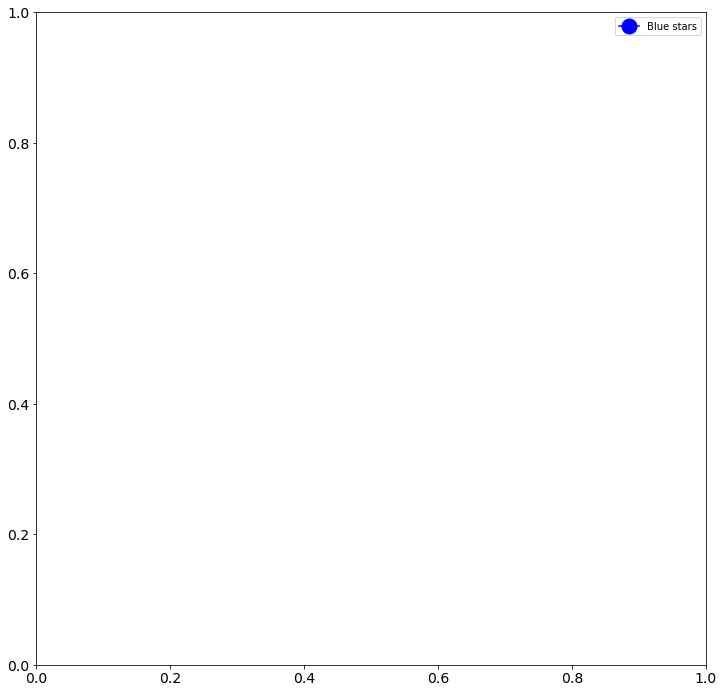

In [49]:
import matplotlib.lines as mlines

blue_line = mlines.Line2D([], [], color='blue', marker='o',
                          markersize=15, label='Blue stars')
plt.legend(handles=[blue_line])

plt.show()

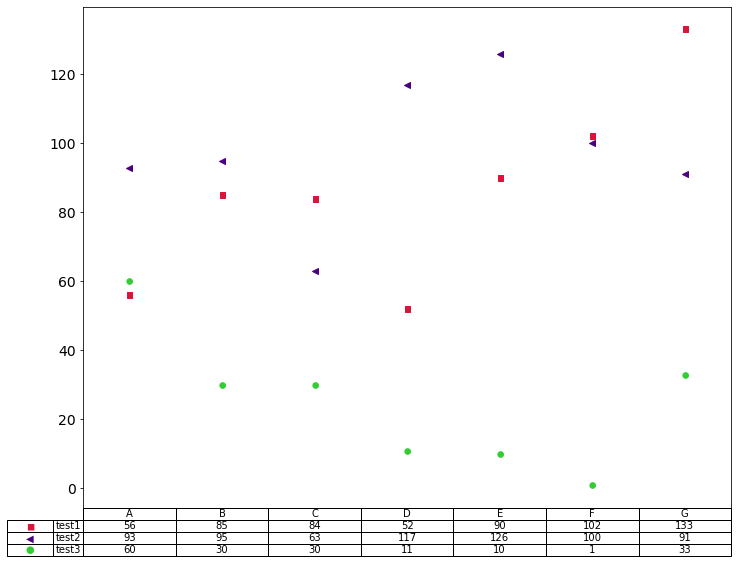

In [61]:
import numpy as np
import matplotlib.pyplot as plt

cell_text = [
                ['56', '85', '84', '52', '90', '102', '133'],
                ['93', '95', '63', '117', '126', '100', '91'],
                ['60', '30', '30', '11', '10', '1', '33']
            ]
cols = ['A', 'B', 'C', 'D', 'E', 'F', 'G']
rows = ["test1","test2","test3"]
shapes = ["◼", "◀", "●"]
colors = ["crimson", "indigo", "limegreen"]

fig, ax = plt.subplots()
fig.subplots_adjust(bottom=0.3, left=0.15)
ax.tick_params(labelbottom=False, bottom=False)

for y, s, c in zip(cell_text, shapes, colors):
    ax.scatter(cols, np.array(y).astype(float), c=c, marker=f"${s}$")
ax.set_xlim(-0.5,len(cols)-0.5)

table = ax.table(cellText=cell_text,
                      cellLoc = 'center',
                      rowLabels=rows,
                      rowColours=None,
                      colLabels=cols,
                      loc='bottom')
height = table.get_celld()[0,0].get_height()

for i in range(len(rows)):
    cell = table.add_cell(i+1, -2, width=0.07, height=height, text=shapes[i], 
                          loc="center")
    cell.get_text().set_color(colors[i])

plt.show()